In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import json
from ibm_watson import VisualRecognitionV4
from ibm_watson.visual_recognition_v4 import AnalyzeEnums, FileWithMetadata
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from IPython.display import clear_output

plt.rcParams['figure.figsize'] = [12, 5]

In [2]:
#retreiving data from the cloud object dtection model

In [3]:
authenticator = IAMAuthenticator(apikey="ZQBgX2TPs2CmC3wNLWGEr7X3xDmq42sDsqTZVCsjdke8")

In [4]:
obj = VisualRecognitionV4(version = '2020-10-03',authenticator=authenticator,)

In [5]:
obj.set_service_url(service_url = 'https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/2fa93f7c-36f0-48f9-abb1-15845fbe94e1')

### Result of single frames

In [6]:
with open('frames/4.png', 'rb') as honda_file,open('frames/4.png', 'rb') as dice_file:
    result = obj.analyze(
        collection_ids=["6a81543e-5dd3-40ac-9017-f127e3c63297",'6a81543e-5dd3-40ac-9017-f127e3c63297'],
        features=[AnalyzeEnums.Features.OBJECTS.value],
        images_file=[
            FileWithMetadata(honda_file),
     
        ], 
    threshold=0.15).get_result()
    print(json.dumps(result, indent=2))

{
  "images": [
    {
      "source": {
        "type": "file",
        "filename": "4.png"
      },
      "dimensions": {
        "height": 401,
        "width": 1081
      },
      "objects": {
        "collections": [
          {
            "collection_id": "6a81543e-5dd3-40ac-9017-f127e3c63297",
            "objects": [
              {
                "object": "car",
                "location": {
                  "left": 523,
                  "top": 5,
                  "width": 142,
                  "height": 71
                },
                "score": 0.62185335
              },
              {
                "object": "car",
                "location": {
                  "left": 279,
                  "top": 1,
                  "width": 150,
                  "height": 81
                },
                "score": 0.6145427
              },
              {
                "object": "car",
                "location": {
                  "left": 13,
                  "

In [7]:
result

{'images': [{'source': {'type': 'file', 'filename': '4.png'},
   'dimensions': {'height': 401, 'width': 1081},
   'objects': {'collections': [{'collection_id': '6a81543e-5dd3-40ac-9017-f127e3c63297',
      'objects': [{'object': 'car',
        'location': {'left': 523, 'top': 5, 'width': 142, 'height': 71},
        'score': 0.62185335},
       {'object': 'car',
        'location': {'left': 279, 'top': 1, 'width': 150, 'height': 81},
        'score': 0.6145427},
       {'object': 'car',
        'location': {'left': 13, 'top': 0, 'width': 170, 'height': 87},
        'score': 0.56982434},
       {'object': 'car',
        'location': {'left': 830, 'top': 13, 'width': 171, 'height': 85},
        'score': 0.5666629},
       {'object': 'car',
        'location': {'left': 885, 'top': 124, 'width': 189, 'height': 86},
        'score': 0.52531046},
       {'object': 'car',
        'location': {'left': 350, 'top': 253, 'width': 199, 'height': 99},
        'score': 0.5153444},
       {'object': 'c

In [8]:
result['images'][0]['objects']['collections'][0]['objects'][1]

{'object': 'car',
 'location': {'left': 279, 'top': 1, 'width': 150, 'height': 81},
 'score': 0.6145427}

In [9]:
FileWithMetadata(honda_file).data

<_io.BufferedReader name='frames/4.png'>

In [10]:
df = {'frame_no':[],'class':[],'left':[],'top':[],'width':[],'height':[]}

In [11]:

for objects in result['images'][0]['objects']['collections'][0]['objects']:
    df['frame_no'].append(1)
    df['class'].append(objects['object'])
    df['left'].append(objects['location']['left'])
    df['top'].append(objects['location']['top'])
    df['width'].append(objects['location']['width'])
    df['height'].append(objects['location']['height'])

In [12]:
pd.DataFrame(df)

,frame_no,class,left,top,width,height
0,1,car,523,5,142,71
1,1,car,279,1,150,81
2,1,car,13,0,170,87
3,1,car,830,13,171,85
4,1,car,885,124,189,86
5,1,car,350,253,199,99
6,1,car,13,109,244,124
7,1,car,511,176,163,80
8,1,car,401,126,92,81
9,1,bike,638,83,82,51


In [13]:
#getting results for all frames
x = '='
tab = '\t'
df = {'frame_no':[],'class':[],'left':[],'top':[],'width':[],'height':[]}
for i in range(1,29):
    with open(f'frames/{i}.png', 'rb') as honda_file:
        result = obj.analyze(
            collection_ids=["6a81543e-5dd3-40ac-9017-f127e3c63297"],
            features=[AnalyzeEnums.Features.OBJECTS.value],
            images_file=[
                FileWithMetadata(honda_file),

            ], threshold=0.15).get_result()
        
        for objects in result['images'][0]['objects']['collections'][0]['objects']:
            if objects['object'] == 'bike':
                df['frame_no'].append(i)
                df['class'].append(objects['object'])
                df['left'].append(objects['location']['left'])
                df['top'].append(objects['location']['top'])
                df['width'].append(objects['location']['width'])
                df['height'].append(objects['location']['height'])
        clear_output(wait = True)
        print(f'{i}/29[',end = '')
        print(x*i,end="")
        print('> ]',end = '')

28/29[============================> ]

In [14]:
print('>',' '*28,']')

>                              ]


In [15]:
df = pd.DataFrame(df)


In [16]:
df

,frame_no,class,left,top,width,height
0,1,bike,786,274,76,64
1,1,bike,214,163,77,60
2,1,bike,171,232,61,45
3,1,bike,393,145,77,46
4,1,bike,886,230,53,46
...,...,...,...,...,...,...
272,28,bike,209,41,87,60
273,28,bike,764,221,66,51
274,28,bike,755,190,62,39
275,28,bike,611,236,68,45


In [17]:
df.to_excel('detected_bikes_with_box_data.xlsx',index = False)

In [18]:
df.left[0]

786

In [19]:
img = cv2.imread('frames/1.png')

In [20]:
i = 3

In [21]:
cv2.rectangle(img,(df.left[i],df.top[i]),
              (df.left[i]+df.width[i],df.top[i]+df.height[i])
              ,(255,0,0), 2)

array([[[163, 175, 180],
        [163, 175, 180],
        [161, 173, 178],
        ...,
        [162, 180, 182],
        [162, 180, 182],
        [163, 181, 183]],

       [[162, 175, 178],
        [162, 175, 178],
        [161, 174, 177],
        ...,
        [159, 177, 179],
        [162, 180, 182],
        [163, 181, 183]],

       [[165, 178, 181],
        [163, 176, 179],
        [163, 176, 179],
        ...,
        [159, 177, 179],
        [159, 177, 179],
        [161, 179, 181]],

       ...,

       [[146, 151, 151],
        [146, 151, 151],
        [147, 152, 152],
        ...,
        [144, 147, 147],
        [144, 147, 147],
        [144, 147, 147]],

       [[145, 150, 150],
        [145, 150, 150],
        [145, 150, 150],
        ...,
        [144, 147, 147],
        [144, 147, 147],
        [146, 149, 149]],

       [[145, 150, 150],
        [145, 150, 150],
        [145, 150, 150],
        ...,
        [144, 147, 147],
        [146, 149, 149],
        [146, 149, 149]]

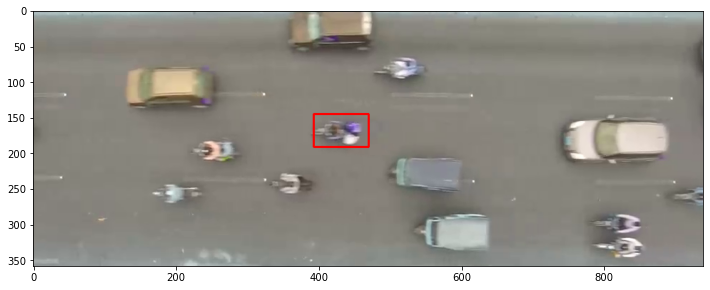

In [22]:
plt.imshow(img)

In [23]:
#generating vehicles detected images
for i in range(1,29):
    img = cv2.imread(f'frames/{i}.png')
    temp_df = df[df['frame_no'] == i]
    for j in range(temp_df.shape[0]):
        cv2.rectangle(img,(temp_df.left.iloc[j],temp_df.top.iloc[j]),
              (temp_df.left.iloc[j]+temp_df.width.iloc[j],temp_df.top.iloc[j]+temp_df.height.iloc[j])
              ,(0,0,255), 2)
    cv2.imwrite(f'ML_results/bikes_results/ML_bike_{i}.png',img)

In [24]:
#counting total no of cars
df1 = {'Frame_no':[],'cars_count':[]}
for i in range(1,29):
    df1['Frame_no'].append(i)
    df1['cars_count'].append(len(df[df['frame_no'] == i]))

In [25]:
df1 = pd.DataFrame(df1)
df1

,Frame_no,cars_count
0,1,9
1,2,13
2,3,10
3,4,6
4,5,5
5,6,18
6,7,3
7,8,8
8,9,6
9,10,19


In [26]:
#finding total area per frames
#generating vehicles detected images
car_area_per_pixel = []
for i in range(1,29):
    img = cv2.imread(f'frames/{i}.png')
    img = np.zeros((img.shape[0],img.shape[1],img.shape[2]),dtype = np.uint8)
    temp_df = df[df['frame_no'] == i]
    for j in range(temp_df.shape[0]):
        cv2.rectangle(img,(temp_df.left.iloc[j],temp_df.top.iloc[j]),
              (temp_df.left.iloc[j]+temp_df.width.iloc[j],temp_df.top.iloc[j]+temp_df.height.iloc[j])
              ,(0,0,255), -1)
    non_zero = np.count_nonzero(img)
    car_area_per_pixel.append(non_zero)

In [27]:
df1['car_area'] = car_area_per_pixel
df1

,Frame_no,cars_count,car_area
0,1,9,28641
1,2,13,38323
2,3,10,32285
3,4,6,25556
4,5,5,12149
5,6,18,55189
6,7,3,6347
7,8,8,31073
8,9,6,26687
9,10,19,56184


In [28]:
df1['car_area_in_percent'] = (df1['car_area'] /   (312*981))*100
df1

,Frame_no,cars_count,car_area,car_area_in_percent
0,1,9,28641,9.357602
1,2,13,38323,12.520910
2,3,10,32285,10.548172
3,4,6,25556,8.349669
4,5,5,12149,3.969327
5,6,18,55189,18.031378
6,7,3,6347,2.073695
7,8,8,31073,10.152186
8,9,6,26687,8.719190
9,10,19,56184,18.356465


In [29]:
df1['density'] = df1['cars_count']/28
df1

,Frame_no,cars_count,car_area,car_area_in_percent,density
0,1,9,28641,9.357602,0.321429
1,2,13,38323,12.520910,0.464286
2,3,10,32285,10.548172,0.357143
3,4,6,25556,8.349669,0.214286
4,5,5,12149,3.969327,0.178571
5,6,18,55189,18.031378,0.642857
6,7,3,6347,2.073695,0.107143
7,8,8,31073,10.152186,0.285714
8,9,6,26687,8.719190,0.214286
9,10,19,56184,18.356465,0.678571


In [30]:
df1.columns = ['Frame_no','bikes_count','bikes_area','bike_area_in_percent','density']

In [31]:
df1

,Frame_no,bikes_count,bikes_area,bike_area_in_percent,density
0,1,9,28641,9.357602,0.321429
1,2,13,38323,12.520910,0.464286
2,3,10,32285,10.548172,0.357143
3,4,6,25556,8.349669,0.214286
4,5,5,12149,3.969327,0.178571
5,6,18,55189,18.031378,0.642857
6,7,3,6347,2.073695,0.107143
7,8,8,31073,10.152186,0.285714
8,9,6,26687,8.719190,0.214286
9,10,19,56184,18.356465,0.678571


In [32]:
df1.to_csv("ML_results.csv",index = False)

In [33]:
df2 = pd.read_csv('ML_CAR_detection.csv')

In [34]:
df2

,Frame_no,cars_count,car_area,car_area_in_percent,density
0,1,5,50059,16.355302,0.178571
1,2,8,90967,29.720785,0.285714
2,3,10,121915,39.832131,0.357143
3,4,9,140427,45.880381,0.321429
4,5,12,117624,38.430173,0.428571
5,6,7,91667,29.949489,0.250000
6,7,10,133859,43.734481,0.357143
7,8,5,62914,20.555294,0.178571
8,9,8,111335,36.375428,0.285714
9,10,11,128425,41.959082,0.392857


In [35]:
for i in ['bikes_count','bikes_area','bike_area_in_percent']:
    df2[i] = df1[i]

In [36]:
df2

,Frame_no,cars_count,car_area,car_area_in_percent,density,bikes_count,bikes_area,bike_area_in_percent
0,1,5,50059,16.355302,0.178571,9,28641,9.357602
1,2,8,90967,29.720785,0.285714,13,38323,12.520910
2,3,10,121915,39.832131,0.357143,10,32285,10.548172
3,4,9,140427,45.880381,0.321429,6,25556,8.349669
4,5,12,117624,38.430173,0.428571,5,12149,3.969327
5,6,7,91667,29.949489,0.250000,18,55189,18.031378
6,7,10,133859,43.734481,0.357143,3,6347,2.073695
7,8,5,62914,20.555294,0.178571,8,31073,10.152186
8,9,8,111335,36.375428,0.285714,6,26687,8.719190
9,10,11,128425,41.959082,0.392857,19,56184,18.356465


In [37]:
df2['bike_density'] = df1['density']

In [38]:
df2

,Frame_no,cars_count,car_area,car_area_in_percent,density,bikes_count,bikes_area,bike_area_in_percent,bike_density
0,1,5,50059,16.355302,0.178571,9,28641,9.357602,0.321429
1,2,8,90967,29.720785,0.285714,13,38323,12.520910,0.464286
2,3,10,121915,39.832131,0.357143,10,32285,10.548172,0.357143
3,4,9,140427,45.880381,0.321429,6,25556,8.349669,0.214286
4,5,12,117624,38.430173,0.428571,5,12149,3.969327,0.178571
5,6,7,91667,29.949489,0.250000,18,55189,18.031378,0.642857
6,7,10,133859,43.734481,0.357143,3,6347,2.073695,0.107143
7,8,5,62914,20.555294,0.178571,8,31073,10.152186,0.285714
8,9,8,111335,36.375428,0.285714,6,26687,8.719190,0.214286
9,10,11,128425,41.959082,0.392857,19,56184,18.356465,0.678571


In [84]:
df = pd.read_csv('Detected_objects.csv')

In [85]:
df

,Frame_NO,BIKES_DETECTED,CARS_DETECTED
0,1,5,5
1,2,7,7
2,3,10,10
3,4,10,11
4,5,10,9
5,6,14,6
6,7,2,8
7,8,6,5
8,9,3,9
9,10,8,9


In [41]:
df['Total_vehicle_detected'] = df['BIKES_DETECTED'] +  df['CARS_DETECTED']

In [42]:
df

,Frame_NO,BIKES_DETECTED,CARS_DETECTED,Total_vehicle_detected
0,1,5,5,10
1,2,7,7,14
2,3,10,10,20
3,4,10,11,21
4,5,10,9,19
5,6,14,6,20
6,7,2,8,10
7,8,6,5,11
8,9,3,9,12
9,10,8,9,17


In [101]:
df['Manual_Bike_results'] = [7,7,11,8,7,15,2,6,6,11,5,8,9,7,10,10,7,13,15,22,11,6,10,4,3,2,12,7]

In [102]:
df['Manual_Car_results'] = [5,7,10,9,11,8,9,5,8,9,8,10,8,6,9,8,10,12,8,9,12,11,8,5,9,4,9,12]

In [103]:
df['Total_manual_results'] = df['Manual_Bike_results'] + df['Manual_Car_results']

In [104]:
df

,Frame_NO,BIKES_DETECTED,CARS_DETECTED,Manual_Bike_results,Manual_Car_results,Total_manual_results
0,1,5,5,7,5,12
1,2,7,8,7,7,14
2,3,10,10,11,10,21
3,4,10,9,8,9,17
4,5,10,12,7,11,18
5,6,14,7,15,8,23
6,7,2,10,2,9,11
7,8,6,5,6,5,11
8,9,3,8,6,8,14
9,10,8,11,11,9,20


In [47]:
df.to_csv("detected_and_real_IP_vehicles.csv",index = False)

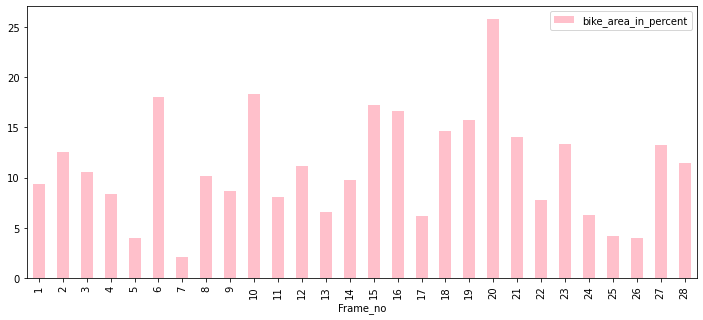

In [48]:
df2.plot(x = 'Frame_no',y = 'bike_area_in_percent',kind = 'bar',color = 'pink')

In [49]:
['Detected_vehicle_count','manual_vehicle_count']

['Detected_vehicle_count', 'manual_vehicle_count']

In [50]:
df.columns

Index(['Frame_NO', 'BIKES_DETECTED', 'CARS_DETECTED', 'Total_vehicle_detected',
       'Manual_Bike_results', 'Manual_Car_results', 'Total_manual_results'],
      dtype='object')

In [51]:
df.columns = ['Frame_NO', 'BIKES_DETECTED', 'CARS_DETECTED', 'Detected_vehicle_count',
       'Manual_Bike_results', 'Manual_Car_results', 'manual_vehicle_count']

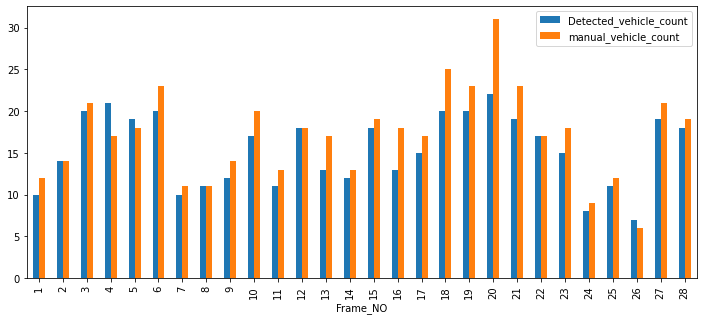

In [52]:
df.plot(x = 'Frame_NO',y = ['Detected_vehicle_count','manual_vehicle_count'],kind = 'bar')

In [68]:
df3 = pd.read_csv('ML_CAR_detection.csv')

In [69]:
df3

,Frame_no,cars_count,car_area,car_area_in_percent,density
0,1,5,50059,16.355302,0.178571
1,2,8,90967,29.720785,0.285714
2,3,10,121915,39.832131,0.357143
3,4,9,140427,45.880381,0.321429
4,5,12,117624,38.430173,0.428571
5,6,7,91667,29.949489,0.250000
6,7,10,133859,43.734481,0.357143
7,8,5,62914,20.555294,0.178571
8,9,8,111335,36.375428,0.285714
9,10,11,128425,41.959082,0.392857


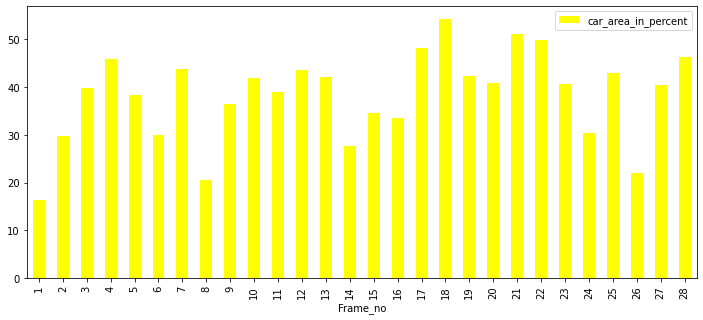

In [72]:
df3.plot(x = 'Frame_no',y = 'car_area_in_percent',kind = 'bar',color = 'yellow')

In [73]:
total_vehicle_area_manual = [8.7,16.31,25.90,20.05,22,25.105,25.10,23.80,13,18.45,24.78,22.01,22.18,23,15.5,18.6,17.8,23.9,
                            27.2,22.8,25.1,25.4,29.7,17.7,17.1,10.5,20.1,16.8]

In [74]:
df3['manual_area_percent'] =total_vehicle_area_manual

In [75]:
df3

,Frame_no,cars_count,car_area,car_area_in_percent,density,manual_area_percent
0,1,5,50059,16.355302,0.178571,8.700
1,2,8,90967,29.720785,0.285714,16.310
2,3,10,121915,39.832131,0.357143,25.900
3,4,9,140427,45.880381,0.321429,20.050
4,5,12,117624,38.430173,0.428571,22.000
5,6,7,91667,29.949489,0.250000,25.105
6,7,10,133859,43.734481,0.357143,25.100
7,8,5,62914,20.555294,0.178571,23.800
8,9,8,111335,36.375428,0.285714,13.000
9,10,11,128425,41.959082,0.392857,18.450


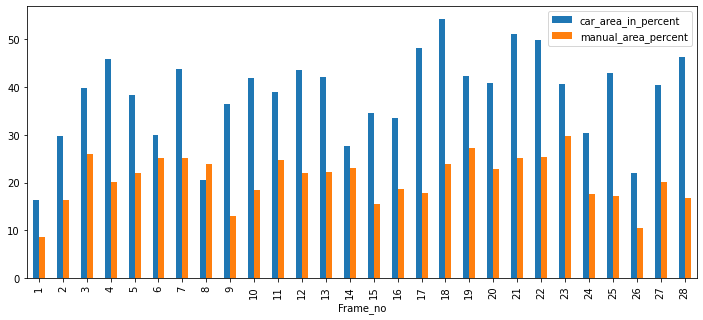

In [76]:
df3.plot(x = 'Frame_no', y=['car_area_in_percent','manual_area_percent'],kind='bar')

In [60]:
ls= []
for i in range(28):
    ls.append(float(input()))

9.03
15.39
20.00
20.85
23.20
20.28
23.83
16.59
17.29
24.84
23.28
23.49
21.93
13.70
18.09
18.22
20.94
27.20
24.54
21.04
23.35
20.33
17.93
15.08
17.61
9.56
19.12
16.08


In [77]:
df3['Calculated_percent(100 - non_occupancy)'] = ls

In [78]:
df3

,Frame_no,cars_count,car_area,car_area_in_percent,density,manual_area_percent,Calculated_percent(100 - non_occupancy)
0,1,5,50059,16.355302,0.178571,8.700,9.03
1,2,8,90967,29.720785,0.285714,16.310,15.39
2,3,10,121915,39.832131,0.357143,25.900,20.00
3,4,9,140427,45.880381,0.321429,20.050,20.85
4,5,12,117624,38.430173,0.428571,22.000,23.20
5,6,7,91667,29.949489,0.250000,25.105,20.28
6,7,10,133859,43.734481,0.357143,25.100,23.83
7,8,5,62914,20.555294,0.178571,23.800,16.59
8,9,8,111335,36.375428,0.285714,13.000,17.29
9,10,11,128425,41.959082,0.392857,18.450,24.84


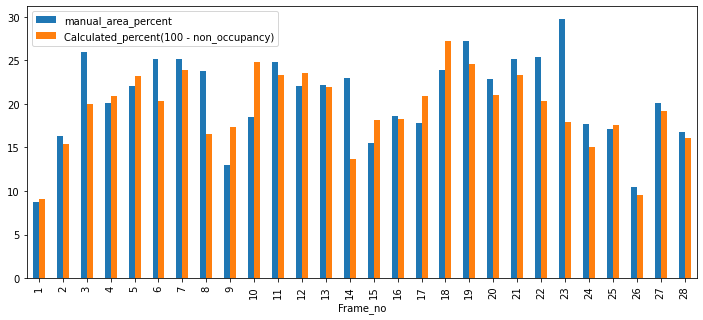

In [80]:
df3.plot(x = 'Frame_no', y=['manual_area_percent','Calculated_percent(100 - non_occupancy)'],kind='bar')

In [81]:
df3.to_csv("Calculated_percent(100 - non_occupancy).csv",index=False)

In [82]:
df1.to_csv('ML_results/bikes_results/bike_results.csv',index = False)

In [83]:
df3

,Frame_no,cars_count,car_area,car_area_in_percent,density,manual_area_percent,Calculated_percent(100 - non_occupancy)
0,1,5,50059,16.355302,0.178571,8.700,9.03
1,2,8,90967,29.720785,0.285714,16.310,15.39
2,3,10,121915,39.832131,0.357143,25.900,20.00
3,4,9,140427,45.880381,0.321429,20.050,20.85
4,5,12,117624,38.430173,0.428571,22.000,23.20
5,6,7,91667,29.949489,0.250000,25.105,20.28
6,7,10,133859,43.734481,0.357143,25.100,23.83
7,8,5,62914,20.555294,0.178571,23.800,16.59
8,9,8,111335,36.375428,0.285714,13.000,17.29
9,10,11,128425,41.959082,0.392857,18.450,24.84


In [87]:
df['CARS_DETECTED'] = df3['cars_count']

In [88]:
df

,Frame_NO,BIKES_DETECTED,CARS_DETECTED
0,1,5,5
1,2,7,8
2,3,10,10
3,4,10,9
4,5,10,12
5,6,14,7
6,7,2,10
7,8,6,5
8,9,3,8
9,10,8,11


In [89]:
df2

,Frame_no,cars_count,car_area,car_area_in_percent,density,bikes_count,bikes_area,bike_area_in_percent,bike_density
0,1,5,50059,16.355302,0.178571,9,28641,9.357602,0.321429
1,2,8,90967,29.720785,0.285714,13,38323,12.520910,0.464286
2,3,10,121915,39.832131,0.357143,10,32285,10.548172,0.357143
3,4,9,140427,45.880381,0.321429,6,25556,8.349669,0.214286
4,5,12,117624,38.430173,0.428571,5,12149,3.969327,0.178571
5,6,7,91667,29.949489,0.250000,18,55189,18.031378,0.642857
6,7,10,133859,43.734481,0.357143,3,6347,2.073695,0.107143
7,8,5,62914,20.555294,0.178571,8,31073,10.152186,0.285714
8,9,8,111335,36.375428,0.285714,6,26687,8.719190,0.214286
9,10,11,128425,41.959082,0.392857,19,56184,18.356465,0.678571


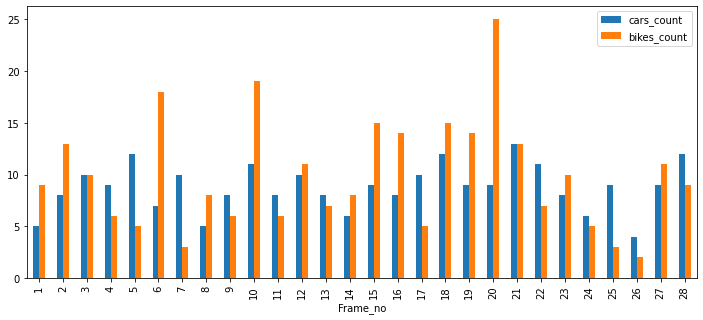

In [91]:
df2.plot(x='Frame_no',y = ['cars_count','bikes_count'],kind = 'bar')

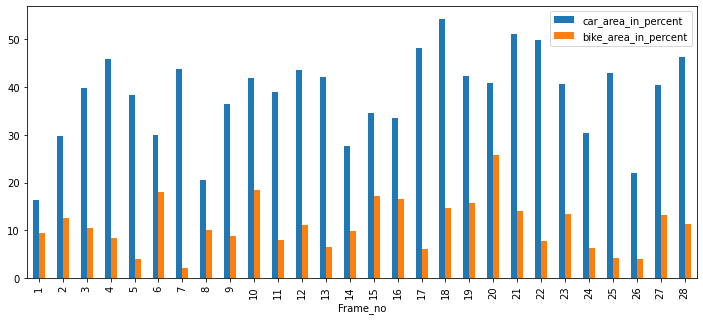

In [92]:
df2.plot(x='Frame_no',y = ['car_area_in_percent','bike_area_in_percent'],kind = 'bar')

In [93]:
df2['Total_density'] = df2['density'] + df2['bike_density']

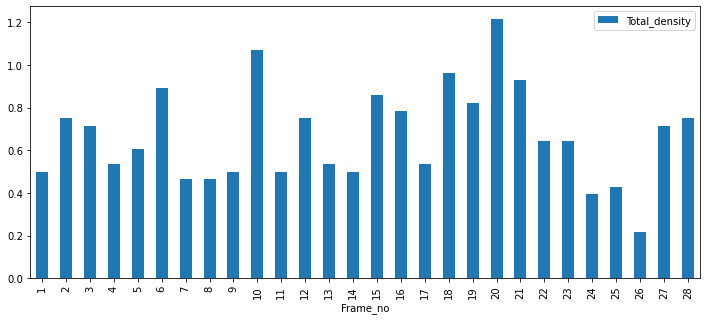

In [95]:
df2.plot(x = 'Frame_no',y = 'Total_density',kind = 'bar')

<BarContainer object of 28 artists>

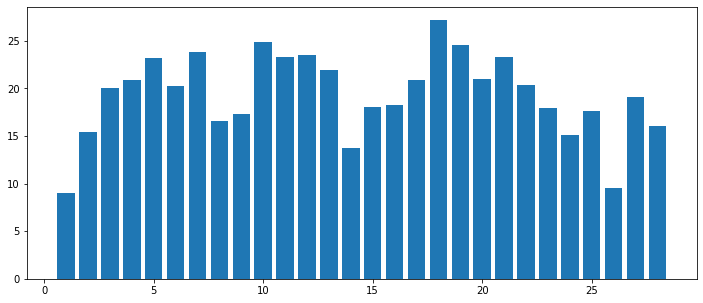

In [96]:
plt.bar(x = df2['Frame_no'],height=df3['Calculated_percent(100 - non_occupancy)'])
plt.xlabel("")

In [97]:
df4 = pd.DataFrame()

In [110]:
df4['frame_no'] = df['Frame_NO']

In [98]:
df4['Total_area_detected'] = df2['cars_count'] + df2['bikes_count']

In [105]:
df4['manual_total_count'] = df['Manual_Bike_results'] + df['Manual_Car_results']

In [107]:
df4

,Total_area_detected,manual_total_count
0,14,12
1,21,14
2,20,21
3,15,17
4,17,18
5,25,23
6,13,11
7,13,11
8,14,14
9,30,20


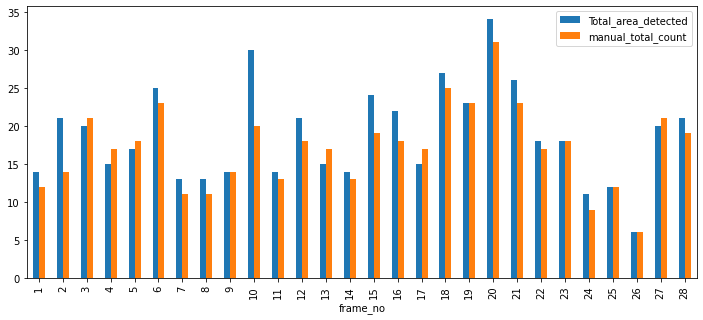

In [113]:
df4.plot(x = 'frame_no',y = ['Total_area_detected','manual_total_count'],kind = 'bar')

In [114]:
df.head(1)

,Frame_NO,BIKES_DETECTED,CARS_DETECTED,Manual_Bike_results,Manual_Car_results,Total_manual_results
0,1,5,5,7,5,12


In [115]:
df4['detected_car_count'] = df['CARS_DETECTED']
df4['detected_bike_count'] = df['BIKES_DETECTED']
df4['manual_bike_count'] = df['Manual_Bike_results']
df4['manual_car_count'] = df['Manual_Car_results']

In [117]:
df4

,Total_area_detected,manual_total_count,frame_no,detected_car_count,detected_bike_count,manual_bike_count,manual_car_count
0,14,12,1,5,5,7,5
1,21,14,2,8,7,7,7
2,20,21,3,10,10,11,10
3,15,17,4,9,10,8,9
4,17,18,5,12,10,7,11
5,25,23,6,7,14,15,8
6,13,11,7,10,2,2,9
7,13,11,8,5,6,6,5
8,14,14,9,8,3,6,8
9,30,20,10,11,8,11,9


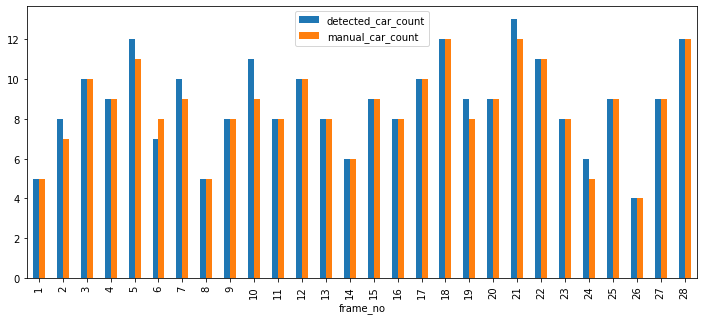

In [118]:
df4.plot(x = 'frame_no',y = ['detected_car_count','manual_car_count'],kind = 'bar')

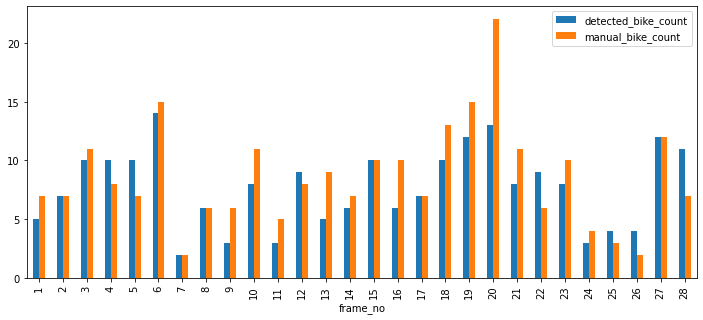

In [119]:
df4.plot(x = 'frame_no',y = ['detected_bike_count','manual_bike_count'],kind = 'bar')